#### From https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# Credit Card Fraud Detection

### SEVERAL CHARACTERISTICS ABOUT THE DATASET
- Highly unbalanced
- Features are under PCA transformation
- Unknown and hidden features

### TERMINAL INSTALLATION

In [ ]:
# !pip install imbalanced-learn

### PACKAGES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

### LOAD THE DATASET

In [3]:
df = pd.read_csv(filepath_or_buffer="../data/data.csv")
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### CLASS DISTRIBUTION VISUALIZATION

In [3]:
counts = df["Class"].value_counts()
print(counts)

Class
0    284315
1       492
Name: count, dtype: int64


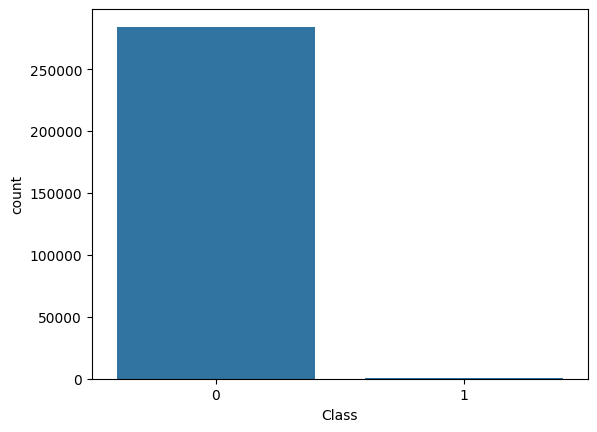

In [55]:
# imbalanced dataset
sns.countplot(data=df, x="Class")

plt.show()

### SPLIT THE DATASET

- Split and scale the train set

In [ ]:
y = df["Class"]
# keep only Amount
X = df.drop(columns=["Time", "Class"])
# temp and test 0.8 - 0.2
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# train and val 0.6 - 0.2
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp)


X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()

# fit only the training test (scale)
X_train_scaled["Amount"] = scaler.fit_transform(X_train[["Amount"]])

# transform on the val/test
X_val_scaled["Amount"] = scaler.transform(X_val[["Amount"]])
X_test_scaled["Amount"] = scaler.transform(X_test[["Amount"]])

- Applying SMOTE technique to resample the training set

In [29]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

- The training set after scaling and resampling

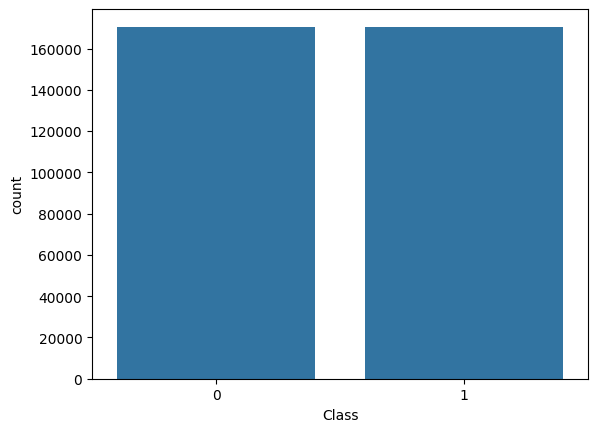

In [30]:
sns.countplot(x=y_train_res)

plt.show()

### BASELINE MODEL WITH LOGISTIC REGRESSION

- Train and fit the model

In [31]:
model_v1 = LogisticRegression()

model_v1.fit(X=X_train_res, y=y_train_res)

y_pred_val = model_v1.predict(X=X_val_scaled)

- Evaluation on the test

In [32]:
# confusion matrix is not very practical to explain
report = classification_report(y_true=y_val, y_pred=y_pred_val)
cm = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.06      0.90      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55429  1434]
 [   10    89]]


- Confusion matrix is useless, using the AUPRC

In [33]:
def evaluate_model(y_true, y_score):
    precision, recall, thresholds = precision_recall_curve(y_true=y_true, y_score=y_score)
    auprc = auc(recall, precision)
    print(f"AUPRC: {auprc:.4f}")

    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (AUPRC = {auprc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

- Model evaluation using AUPRC

AUPRC: 0.7765


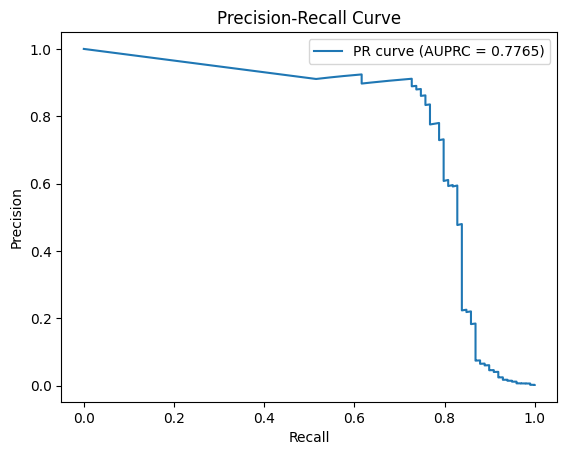

In [38]:
# get the fraud probability, all rows, but get the second probability
y_score = model_v1.predict_proba(X_val_scaled)[:, 1]
evaluate_model(y_val, y_score)

### TRY WITH XGBOOT MODEL

In [45]:
model_v2 = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42,
)

model_v2.fit(X_train_res, y_train_res)
y_pred_val = model_v2.predict(X_val_scaled)

- Model evaluation with confusion matrix

In [43]:
# confusion matrix is not very practical to explain
report = classification_report(y_true=y_val, y_pred=y_pred_val)
cm = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.29      0.86      0.43        99

    accuracy                           1.00     56962
   macro avg       0.64      0.93      0.71     56962
weighted avg       1.00      1.00      1.00     56962

[[56653   210]
 [   14    85]]


- Model evaluation with AUPRC

AUPRC: 0.8330


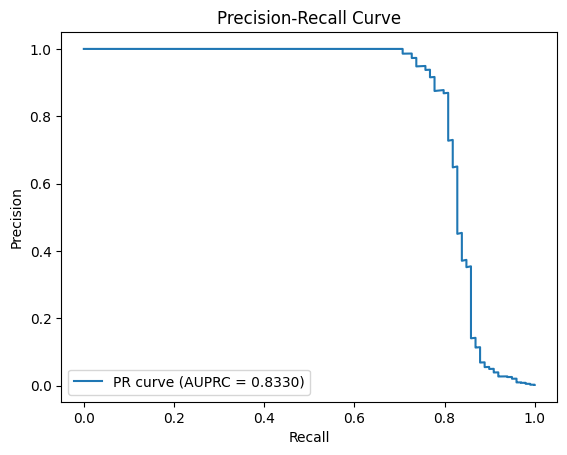

In [44]:
y_score = model_v2.predict_proba(X=X_val_scaled)[:, 1]
evaluate_model(y_val, y_score)

### TRY WITH RANDOM FOREST

In [48]:
model_v3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

model_v3.fit(X=X_train_res, y=y_train_res)

y_pred_val = model_v3.predict(X=X_val_scaled)

- Model evaluation with confusion matrix

In [49]:
# confusion matrix is not very practical to explain
report = classification_report(y_true=y_val, y_pred=y_pred_val)
cm = confusion_matrix(y_true=y_val, y_pred=y_pred_val)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.95      0.97        99

    accuracy                           1.00     56962
   macro avg       0.99      0.97      0.98     56962
weighted avg       1.00      1.00      1.00     56962

[[56862     1]
 [    5    94]]


- Model avaluation with AUPRC

AUPRC: 0.9637


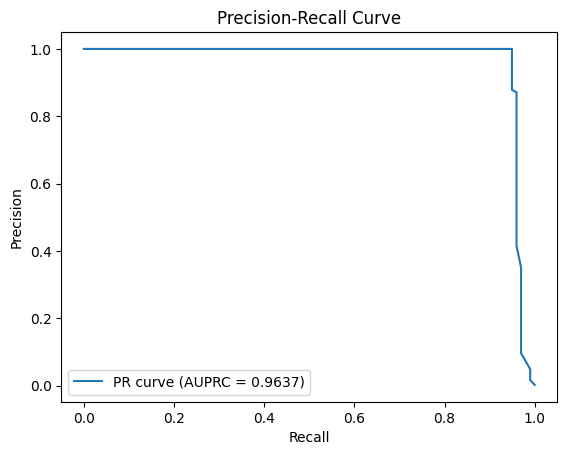

In [50]:
y_score = model_v3.predict_proba(X=X_val_scaled)[:, 1]
evaluate_model(y_val, y_score)

### MERGE TRAIN AND VAL SET INTO A TRAIN SET, APPYING RANDOM FOREST MODEL

- Concatenating the train and val set into a single train set

In [57]:
X_trainval_scaled = pd.concat([X_train_scaled, X_val_scaled], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)

- Applying the SMOTE technique to handle imbalance dataset

In [58]:
smote_v4 = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_trainval_scaled, y_trainval)

- Retrain the model of RandomForest

In [59]:
model_v4 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

model_v4.fit(X=X_train_res, y=y_train_res)
y_pred = model_v4.predict(X=X_test_scaled)

- Confusion matrix

In [60]:
# confusion matrix is not very practical to explain
report = classification_report(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(report)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56850    14]
 [   17    81]]


- Evaluate on AUPRC

AUPRC: 0.8719


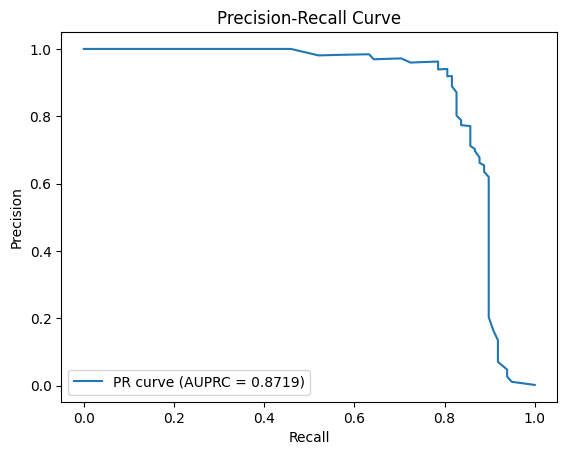

In [61]:
y_score = model_v4.predict_proba(X=X_test_scaled)[:, 1]
evaluate_model(y_test, y_score)